Project Plan Notebook: 
Define project steps and duration 
Export both to reports

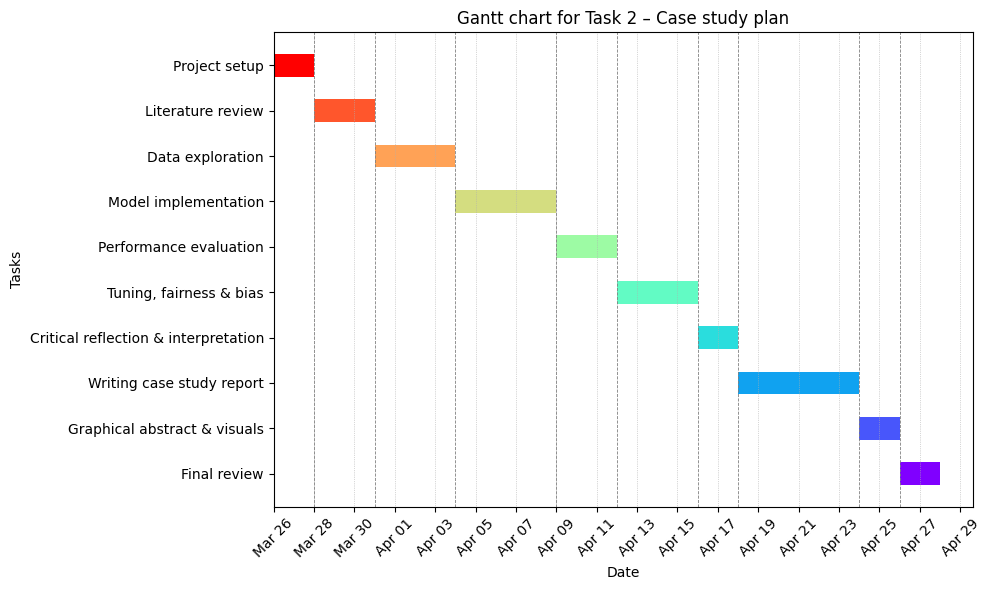

In [1]:
# Complete and improved version of the user's Gantt chart code with rainbow colors, PNG export, and markdown table export

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import matplotlib.cm as cm

# Define today's date
start_date = datetime.date.today()

# Define the Gantt chart tasks and durations
tasks = [
    ("Project setup", 2),
    ("Literature review", 3),
    ("Data exploration", 4),
    ("Model implementation", 5),
    ("Performance evaluation", 3),
    ("Tuning, fairness & bias", 4),
    ("Critical reflection & interpretation", 2),
    ("Writing case study report", 6),
    ("Graphical abstract & visuals", 2),
    ("Final review", 2),
]

# Calculate start and end dates
task_data = []
current_date = start_date

for task, duration in tasks:
    end_date = current_date + datetime.timedelta(days=duration)
    task_data.append((task, current_date, end_date))
    current_date = end_date

# Create DataFrame and reverse the task order for top-down flow
df = pd.DataFrame(task_data, columns=["Task", "Start", "End"])
df = df.iloc[::-1].reset_index(drop=True)

# Plotting with rainbow colors
fig, ax = plt.subplots(figsize=(10, 6))
colors = cm.rainbow(np.linspace(0, 1, len(df)))

for i, row in df.iterrows():
    ax.barh(
        row["Task"].capitalize(),
        (row["End"] - row["Start"]).days,
        left=row["Start"],
        height=0.5,
        color=colors[i]
    )
    ax.axvline(row["Start"], color='gray', linestyle='--', linewidth=0.6)

# Format the x-axis
ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Tasks")
plt.title("Gantt chart for Task 2 – Case study plan")
plt.tight_layout()
plt.grid(True, axis='x', linestyle=':', linewidth=0.5)

# Export chart to file
chart_path = "../reports/gantt_chart_task2.png"
plt.savefig(chart_path)